## Demo notebook, pyeyesim library

this notebook is for testing and developing the PyEyeSim library for eye-movement comparison for looking at static images 

tested with dependencies:
- xarray: 0.19.0
- pandas: 1.3.2
- numpy: 1.20.3
- matplotlib: 3.4.2
- scipy: 1.7.1 


### Import dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from scipy import stats


### import PyEyeSim library

In [2]:
from PyEyeSim import pyeyesim as pysim


for development: changes should load automatically

In [3]:
%load_ext autoreload
%autoreload 2

##  Set file path and load data file 

In [4]:
MemoryStudy=1

GenderStudy=1
Mac=1
if GenderStudy:
    if Mac:
        Filepath='/Volumes/GoogleDrive/My Drive/Vienna/CreaLab/GenderProject/GenderIIFemalePaint.csv'
    else:
        Filepath='C:\\Users\\aratoj87\\Google Drive\\Vienna\\CreaLab\\GenderProject\\GenderIIFemalePaint.csv'
    
    sizeX=2560
    sizeY=1600
     #StimN='Pa'
if MemoryStudy:
    if Mac:
        Filepath='/Users/jarato/Documents/EyeTracking/MemoryStudyFix.csv'
    else:
        Filepath='C:\\Users\\aratoj87\\Documents\\EyeTracking\\WilmKonigDatabase\\MemoryStudyFix.csv'
    sizeX=1280
    sizeY=960


FixData=pd.read_csv(Filepath)
if MemoryStudy:
    FixData=FixData[FixData['Repetition']==1]
   # StimN='Stimulus'


#
#fixData=pd.read_csv(Filepath)
FixData

,Unnamed: 0,subjectID,Stimulus,Category,Repetition,mean_x,mean_y,length
0,0,1.0,5.0,7.0,1.0,427.388885,553.743713,270.0
1,1,1.0,5.0,7.0,1.0,782.835693,379.505615,286.0
2,2,1.0,5.0,7.0,1.0,701.805664,303.241455,280.0
3,3,1.0,5.0,7.0,1.0,864.697998,416.245056,382.0
4,4,1.0,5.0,7.0,1.0,382.930786,622.229553,312.0
...,...,...,...,...,...,...,...,...
157622,11,45.0,357.0,11.0,1.0,320.969360,458.779053,248.0
157623,12,45.0,357.0,11.0,1.0,528.981812,314.425323,308.0
157624,13,45.0,357.0,11.0,1.0,387.832642,302.768646,300.0
157625,14,45.0,357.0,11.0,1.0,806.179077,365.289215,296.0


In [4]:
FixData

,Unnamed: 0,subjectID,Stimulus,Category,Repetition,mean_x,mean_y,length
0,0,1.0,5.0,7.0,1.0,427.388885,553.743713,270.0
1,1,1.0,5.0,7.0,1.0,782.835693,379.505615,286.0
2,2,1.0,5.0,7.0,1.0,701.805664,303.241455,280.0
3,3,1.0,5.0,7.0,1.0,864.697998,416.245056,382.0
4,4,1.0,5.0,7.0,1.0,382.930786,622.229553,312.0
...,...,...,...,...,...,...,...,...
157622,11,45.0,357.0,11.0,1.0,320.969360,458.779053,248.0
157623,12,45.0,357.0,11.0,1.0,528.981812,314.425323,308.0
157624,13,45.0,357.0,11.0,1.0,387.832642,302.768646,300.0
157625,14,45.0,357.0,11.0,1.0,806.179077,365.289215,296.0


set size of stimulus in pixels (if same for all)

## Example dataset 1


In [5]:
MyMemoryDat=pysim.EyeData('MemoryStudy','Within',FixData,sizeX,sizeY)


Fixation dataset MemoryStudy
dataset size:  (33806, 8)
study design:  Within
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
column found:  StimName  default:  Stimulus
column found:  SubjName  default:  subjectID
column found:  mean_x  default:  mean_x
column found:  mean_y  default:  mean_y


### load data and provide info fixation duration column 

In [6]:
MyMemoryDat.DataInfo(FixDuration='length')

info found for 45 subjects, and 48 stimuli
Stim path not provided


### calculate descriptives

Data for  45 observers and  48  stimuli.
19.0  Bound over y_size found indicating out of stimulus area fixations-replaced with 960
20.0  Bound over y_size found indicating out of stimulus area fixations-replaced with 960
27.0  Bound over y_size found indicating out of stimulus area fixations-replaced with 960
28.0  Bound over y_size found indicating out of stimulus area fixations-replaced with 960
46.0  Bound over y_size found indicating out of stimulus area fixations-replaced with 960
107.0  Bound over y_size found indicating out of stimulus area fixations-replaced with 960
131.0  Bound below zeroY found indicating out of stimulus area fixations-replaced with 0
133.0  Bound below zero X found indicating out of stimulus area fixations-replaced with 0
133.0  Bound over y_size found indicating out of stimulus area fixations-replaced with 960
146.0  Bound over x_size found indicating out of stimulus area fixations-replaced with 1280
146.0  Bound over y_size found indicating out of stimulu

/Users/jarato/opt/anaconda3/envs/pymc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jarato/opt/anaconda3/envs/pymc_env/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Mean fixation number:  15.65  +/-  2.08
Mean fixation duration:  316.5  +/-  31.7 msec
Num of trials with zero fixations: 8
Num valid trials  2152
Mean X location:  648.5  +/-  30.1  pixels
Mean Y location:  468.0  +/-  30.0  pixels
Mean saccade  amplitude:  253.7  +/-  36.1  pixels
Mean scanpath  length:  3719.8  +/-  699.7  pixels


(array([  5.,  17.,  19.,  20.,  22.,  27.,  28.,  29.,  30.,  43.,  45.,
         46., 101., 103., 107., 113., 114., 129., 131., 133., 135., 146.,
        148., 156., 202., 203., 209., 218., 219., 231., 243., 244., 250.,
        252., 255., 262., 304., 305., 306., 307., 329., 330., 331., 332.,
        354., 355., 356., 357.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45.]))

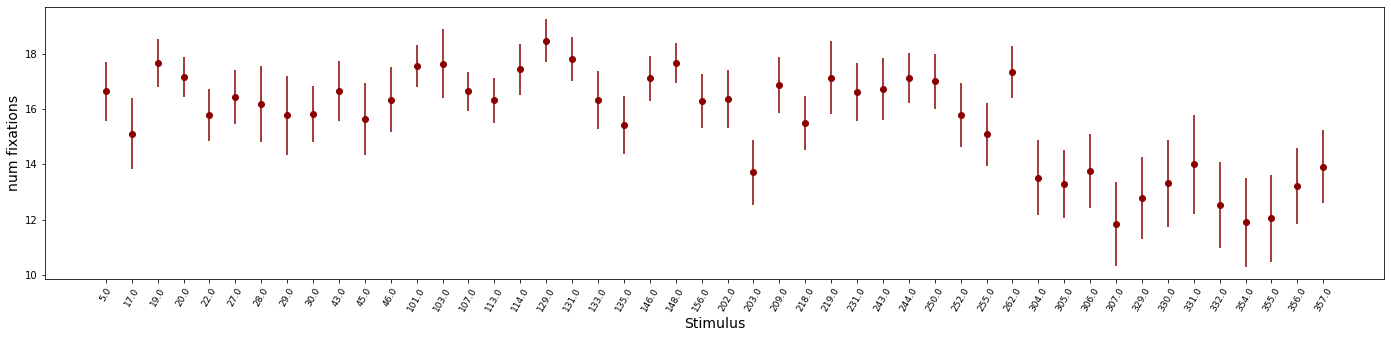

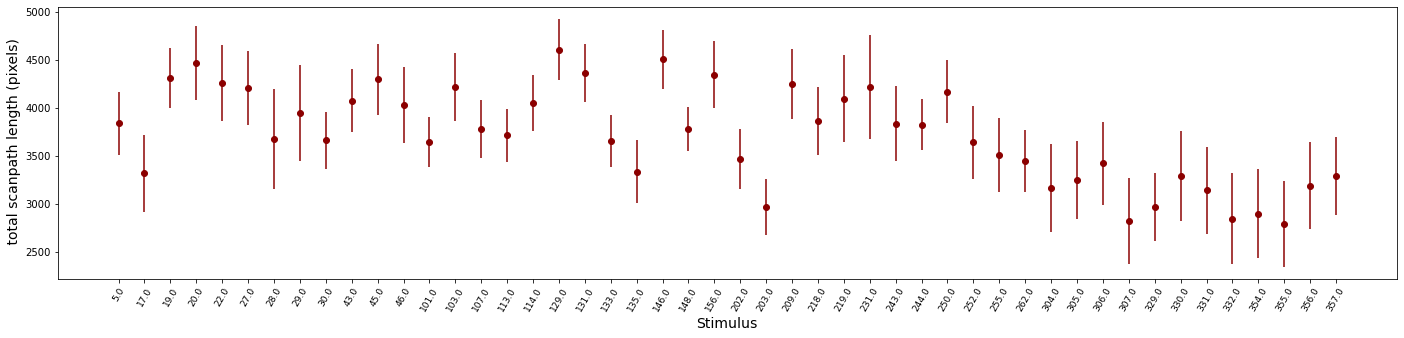

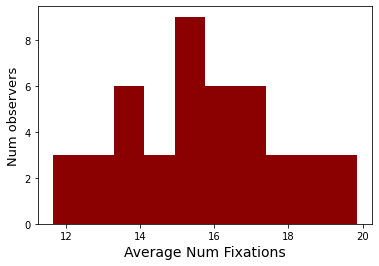

In [26]:
MyMemoryDat.RunDescriptiveFix(Visual=1,duration=1)

## Example dataset 2

In [203]:

MyGenderDat=pysim.EyeData('GenderStudy','Between',FixData,sizeX,sizeY)

Fixation dataset GenderStudy
dataset size:  (51615, 13)
study design:  Between
presentation size:  x= 2560 pixels y= 1600  pixels
presentation size:  x= 2560 pixels y= 1600  pixels
StimName  not found !!, provide column as .DataInfo(StimName='YourColumn') default Stimulus
column found:  SubjName  default:  subjectID
column found:  mean_x  default:  mean_x
column found:  mean_y  default:  mean_y


## provide info on stimulus path

In [204]:
Path='C:\\Users\\aratoj87\\Documents\\ArtHistory\\GenderProject\\Gender II_StudyDesign_Images\\Female Paintings\\'
MyGenderDat.DataInfo(StimName='Painting',StimPath=Path,StimExt='.jpg')


info found for 56 subjects, and 12 stimuli
stimuli loaded succesfully, access as self.images


In [179]:
MyGenderDat.data

,Unnamed: 0,Unnamed: 0.1,subjectID,Number,GazePoints,mean_x,mean_y,radius,Cluster,Stimulus,PartGend,Gaze Points,Radius
0,0,0,G_001,1.0,30.0,1231.0,860.0,19.9396,0.0,Bellini_Halbakt,Male,NaN,NaN
1,1,1,G_001,2.0,13.0,1242.0,412.0,25.8158,0.0,Bellini_Halbakt,Male,NaN,NaN
2,2,2,G_001,3.0,20.0,1255.0,419.0,37.4225,0.0,Bellini_Halbakt,Male,NaN,NaN
3,3,3,G_001,4.0,31.0,1270.0,440.0,25.6350,0.0,Bellini_Halbakt,Male,NaN,NaN
4,4,4,G_001,5.0,48.0,1045.0,751.0,37.7525,0.0,Bellini_Halbakt,Male,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51610,28411,3714,P74_VF,74.0,36.0,823.0,656.0,23.1638,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN
51611,28412,3715,P74_VF,75.0,22.0,850.0,658.0,20.8895,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN
51612,28413,3716,P74_VF,76.0,14.0,828.0,668.0,27.6424,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN
51613,28414,3717,P74_VF,77.0,17.0,825.0,659.0,28.2337,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN


Data for  56 observers and  12  stimuli.
Mean fixation number:  76.81  +/-  11.44
fixation duration not asked for
Num of trials with zero fixations: 1
Num valid trials  671
Mean X location:  1302.5  +/-  53.0  pixels
Mean Y location:  771.5  +/-  78.3  pixels


(array(['Bellini_Halbakt', 'Bouguereau_JungeFrau', 'Cranach_Venus',
        'David_Recamier', 'Gentileschi_Maria', 'Goya_MajaAngezogen',
        'Goya_MajaNacht', 'Ingres_Odaliske', 'Spiro_Halbakt',
        'Valadon_Selbstbildnis', 'VanLoo_JungeFrau',
        'Wittmann_Selbstbildnis'], dtype=object),
 array(['G_001', 'G_002', 'G_003', 'G_004', 'G_006', 'G_007', 'G_009',
        'G_010', 'G_011', 'G_014', 'G_016', 'G_017', 'G_019', 'G_020',
        'G_021', 'G_023', 'G_025', 'G_026', 'G_027', 'G_030', 'G_031',
        'G_033', 'G_034', 'G_036', 'G_037', 'G_038', 'G_039', 'G_042',
        'G_043', 'G_044', 'G_045', 'G_046', 'G_048', 'G_050', 'G_051',
        'G_053', 'G_054', 'G_055', 'G_056', 'G_057', 'G_058', 'G_059',
        'G_060', 'G_061', 'G_062', 'G_064', 'G_065', 'G_066', 'P72_VF',
        'P74_VF', 'P78_VF', 'P79_VF', 'P81_VF', 'P84_VF', 'P85_VF',
        'P87_VF'], dtype=object))

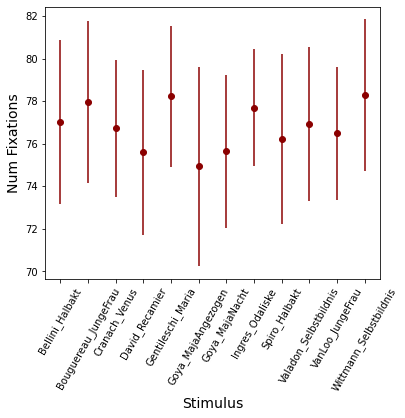

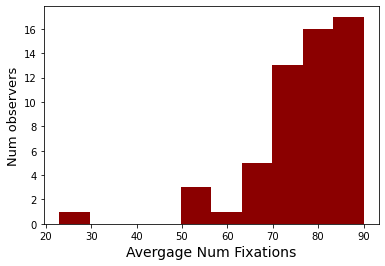

In [205]:
MyGenderDat.RunDescriptiveFix(Visual=1,duration=0)

### access descripitve stastics as attributes:

c:\users\aratoj87\documents\github\pyeyesim\PyEyeSim\pyeyesim.py:196: RuntimeWarning: Mean of empty slice
  Y=np.nanmean(np.nanmean(self.durprog,1),0)
c:\users\aratoj87\documents\github\pyeyesim\PyEyeSim\pyeyesim.py:197: RuntimeWarning: Mean of empty slice
  Err=stats.sem(np.nanmean(self.durprog,1),axis=0,nan_policy='omit')


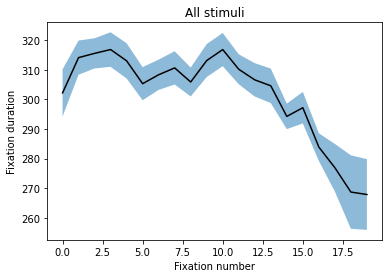

In [185]:
MyMemoryDat.FixDurProg(10)

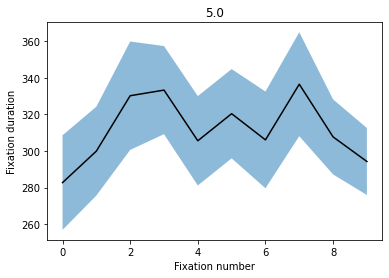

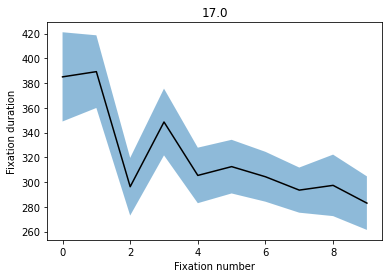

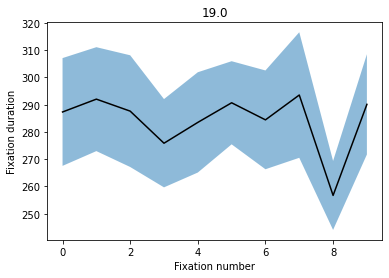

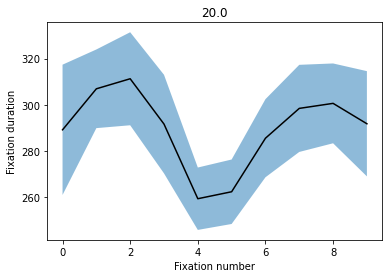

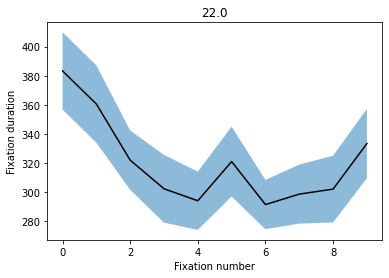

In [169]:
for stim in MyDat.stimuli[0:5]:
    MyDat.FixDurProg(10,Stim=stim)
   

In [100]:
MyDat.durations

array([[272.52631579, 314.35294118, 272.63157895, ..., 365.29411765,
        281.05263158, 287.22222222],
       [246.125     , 412.        , 245.5       , ..., 356.22222222,
        274.        , 321.28571429],
       [281.68421053, 325.625     , 230.09090909, ..., 494.66666667,
        436.6       , 556.        ],
       ...,
       [313.05882353, 395.69230769, 480.33333333, ..., 558.        ,
        431.4       , 424.33333333],
       [247.71428571, 278.94736842, 289.        , ..., 327.125     ,
        308.23529412, 315.        ],
       [276.11111111, 294.        , 326.26666667, ..., 315.625     ,
        336.93333333, 319.375     ]])

In [211]:
?MyDat.GetEntropies

In [206]:
dir(MyGenderDat)

['BinnedCount',
 'CompareGroupsFix',
 'CompareGroupsHeatMap',
 'DataInfo',
 'Entropy',
 'FixCountCalc',
 'FixDurProg',
 'GetDurations',
 'GetEntropies',
 'GetFixationData',
 'GetGroups',
 'GetParams',
 'GetStimuli',
 'Heatmap',
 'InferSize',
 'RunDescriptiveFix',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'bounds',
 'boundsX',
 'boundsY',
 'data',
 'design',
 'images',
 'info',
 'meanfix_xy',
 'name',
 'nfix',
 'nfixations',
 'np',
 'ns',
 'sdfix_xy',
 'stimuli',
 'subjects',
 'x_size',
 'y_size']

In [209]:
MyGenderDat.subjects

array(['G_001', 'G_002', 'G_003', 'G_004', 'G_006', 'G_007', 'G_009',
       'G_010', 'G_011', 'G_014', 'G_016', 'G_017', 'G_019', 'G_020',
       'G_021', 'G_023', 'G_025', 'G_026', 'G_027', 'G_030', 'G_031',
       'G_033', 'G_034', 'G_036', 'G_037', 'G_038', 'G_039', 'G_042',
       'G_043', 'G_044', 'G_045', 'G_046', 'G_048', 'G_050', 'G_051',
       'G_053', 'G_054', 'G_055', 'G_056', 'G_057', 'G_058', 'G_059',
       'G_060', 'G_061', 'G_062', 'G_064', 'G_065', 'G_066', 'P72_VF',
       'P74_VF', 'P78_VF', 'P79_VF', 'P81_VF', 'P84_VF', 'P85_VF',
       'P87_VF'], dtype=object)

### run group comparison

Conditions ['Female' 'Male']
Calculating entropy
0 Bellini_Halbakt 5.65 maximum entropy 6.93
1 Bouguereau_JungeFrau 5.09 maximum entropy 5.97
2 Cranach_Venus 5.24 maximum entropy 6.27
3 David_Recamier 5.62 maximum entropy 6.93
4 Gentileschi_Maria 5.91 maximum entropy 6.97


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\scipy\stats\_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


5 Goya_MajaAngezogen 5.51 maximum entropy 7.0
6 Goya_MajaNacht 5.5 maximum entropy 6.9
7 Ingres_Odaliske 6.12 maximum entropy 7.15
8 Spiro_Halbakt 5.47 maximum entropy 6.41
9 Valadon_Selbstbildnis 5.92 maximum entropy 7.12
10 VanLoo_JungeFrau 5.57 maximum entropy 6.34
11 Wittmann_Selbstbildnis 5.47 maximum entropy 6.38
0 Female Num fix=  77.39 +/- 13.25
0 Female Entropy=  3.67 +/- 0.24
1 Male Num fix=  76.26 +/- 9.41
1 Male Entropy=  3.65 +/- 0.16


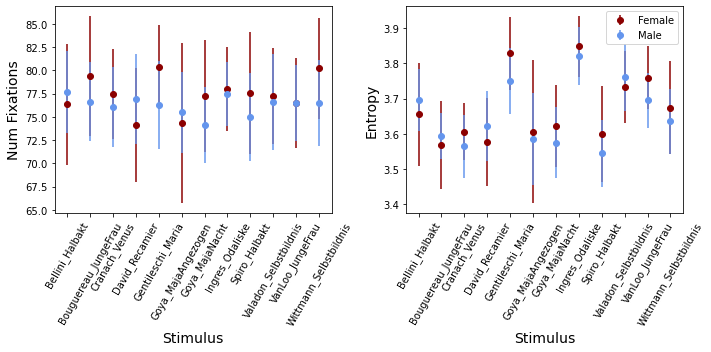

In [210]:
MyGenderDat.CompareGroupsFix('PartGend')

## print availible methods and attributes

uppercase letter for methods.
lowercase for data attributes


In [214]:
dir(MyGenderDat) 

['BinnedCount',
 'CompareGroupsFix',
 'CompareGroupsHeatMap',
 'Conds',
 'DataInfo',
 'Entropy',
 'FixCountCalc',
 'FixDurProg',
 'GetDurations',
 'GetEntropies',
 'GetFixationData',
 'GetGroups',
 'GetParams',
 'GetStimuli',
 'Heatmap',
 'InferSize',
 'RunDescriptiveFix',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'bounds',
 'boundsX',
 'boundsY',
 'data',
 'design',
 'entropies',
 'entropies_ind',
 'entropmax',
 'images',
 'info',
 'meanfix_xy',
 'name',
 'nfix',
 'nfixations',
 'np',
 'ns',
 'sdfix_xy',
 'stimuli',
 'subjects',
 'x_size',
 'y_size']

In [216]:

MyGenderDat.entropies_ind

(56, 12)

In [109]:
for i in range(5):
    print(MyDat.nfixations[:,i])

[19. 16. 19. 16. 18. 14. 16. 12.  7. 15.  6. 15. 18. 16. 25. 17. 16. 18.
 20. 20. 18. 13. 19. 21. 16. 12. 16. 20. 20. 16. 15. 14. 20. 18. 17. 16.
 16. 16. 16. 22. 10. 19. 17. 21. 18.]
[17.  4. 16. 20. 17. 19. 15. 12. 14. 13. 17.  8. 18. 13. 14. 12. 11. 17.
 21. 11. 16. 16. 17. 19. 15.  7. 19. 16. 11. 17. 18. 17. 18. 17. 10. 17.
  9. 19.  3. 23. 19. 19. 13. 19. 17.]
[19. 20. 22. 23. 18. 18. 16. 20. 18. 20. 17. 17. 16. 14. 23. 15. 16. 21.
 16. 19. 18. 17. 17. 23. 18. 16. 17. 12. 19. 18. 19. 15. 18. 20. 20. 18.
 10. 17. 14. 21. 14. 21. 12. 18. 15.]
[17. 18. 18. 21. 16. 13. 15. 16. 15. 14. 20. 16. 15. 17. 19. 15. 20. 22.
 16. 16. 20. 19. 18. 19. 18. 19. 14. 17. 18. 18. 18. 17. 15. 20. 15. 18.
 16. 15. 17. 20. 10. 21. 15. 18. 18.]
[18. 14. 17. 21. 19.  9. 15. 14.  9. 14. 17. 17. 15. 14. 19. 14. 15. 18.
 13. 15. 18. 17. 15. 21. 14. 12. 15. 18. 17. 15. 19. 16. 18. 14. 16. 16.
 18. 17. 13. 14.  7. 20. 11. 21. 21.]


## accessing data as xarray attributes
the advantage of xarray is named coordinates, that can also be indexed as a numpy array:


NFix.sel(subjectID='G_001',Painting='Spiro_Halbakt') 

NFix[0,8]

should give the same result


In [20]:
MyDat.NFix.sel(Stimulus='Spiro_Halbakt')

<xarray.DataArray (subjectID: 56)>
array([ 82.,  78.,  70., 100.,  62.,  75.,  87.,  88.,  82.,  80.,  71.,
        65.,  83.,  81.,  68.,  65.,  74.,  94.,  85.,  79.,  75.,  77.,
        82.,  78.,  78.,  79.,  80.,  92.,  82.,  84.,  62.,  12.,  73.,
        60.,  97.,  85.,  88.,  74.,  88.,  72.,  90.,  72.,  84.,  89.,
        99.,  92.,  40.,  92.,  69.,  48.,  81.,  64.,  73.,  60.,  57.,
        71.])
Coordinates:
  * subjectID  (subjectID) object 'G_001' 'G_002' 'G_003' ... 'P85_VF' 'P87_VF'
    Stimulus   <U13 'Spiro_Halbakt'

In [21]:
MyDat.NFix.sel(subjectID='G_001') 

<xarray.DataArray (Stimulus: 12)>
array([81., 79., 87., 75., 70., 80., 79., 80., 82., 73., 78., 80.])
Coordinates:
    subjectID  <U5 'G_001'
  * Stimulus   (Stimulus) object 'Bellini_Halbakt' ... 'Wittmann_Selbstbildnis'

## Saliency map for a given stimulus

SD parameter: smoothness in pixels

Vis parameter: whether plot shows up

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

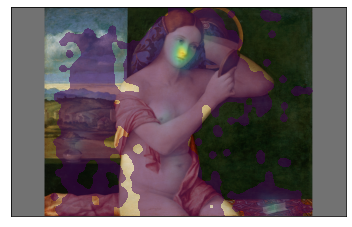

In [213]:
MyGenderDat.Heatmap('Bellini_Halbakt',SD=25,Vis=1)

### Saliency map comparison

Conditions ['Female' 'Male']


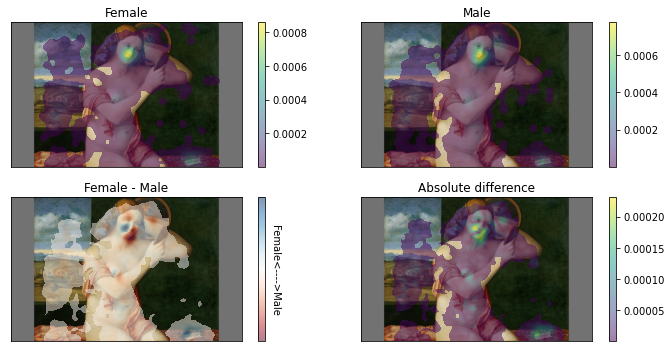

In [195]:
MyGenderDat.CompareGroupsHeatMap(Stim='Bellini_Halbakt',betwcond='PartGend',SD=30)

Conditions ['Female' 'Male']


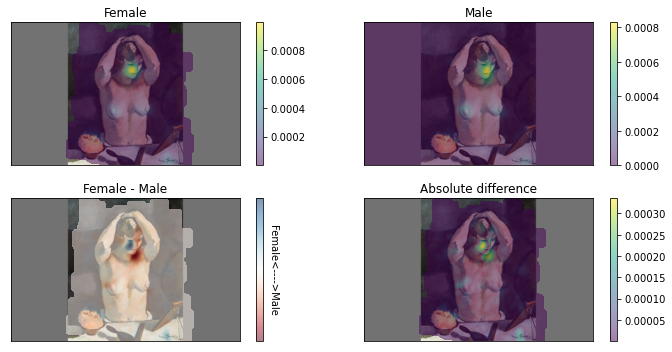

In [37]:
MyDat.CompareGroupsHeatMap(Stim='Spiro_Halbakt',betwcond='PartGend',SD=30)

In [193]:
hasattr(MyGenderDat,'Stims')

False

## old code
## Saliency map and entropy for multiple stimuli
### (slow)

todo: use only area with fixations for saliency map calculation

0 Bellini_Halbakt 415 2150 109 1639
0 Bellini_Halbakt entropy: 4.42 relative entropy 0.8
1 Bouguereau_JungeFrau 905 1630 151 1569
1 Bouguereau_JungeFrau entropy: 3.82 relative entropy 0.83
2 Cranach_Venus 874 1762 97 1662
2 Cranach_Venus entropy: 3.94 relative entropy 0.82
3 David_Recamier 267 2184 159 1510
3 David_Recamier entropy: 4.4 relative entropy 0.8
4 Gentileschi_Maria 374 2298 111 1558
4 Gentileschi_Maria entropy: 4.7 relative entropy 0.84
5 Goya_MajaAngezogen 197 2440 268 1522
5 Goya_MajaAngezogen entropy: 4.28 relative entropy 0.77
6 Goya_MajaNacht 166 2451 316 1435
6 Goya_MajaNacht entropy: 4.25 relative entropy 0.77
7 Ingres_Odaliske 123 2578 206 1540
7 Ingres_Odaliske entropy: 4.9 relative entropy 0.85
8 Spiro_Halbakt 814 1879 209 1673
8 Spiro_Halbakt entropy: 4.18 relative entropy 0.84
9 Valadon_Selbstbildnis 245 2254 103 1681
9 Valadon_Selbstbildnis entropy: 4.72 relative entropy 0.83
10 VanLoo_JungeFrau 735 1832 224 1583
10 VanLoo_JungeFrau entropy: 4.24 relative entro

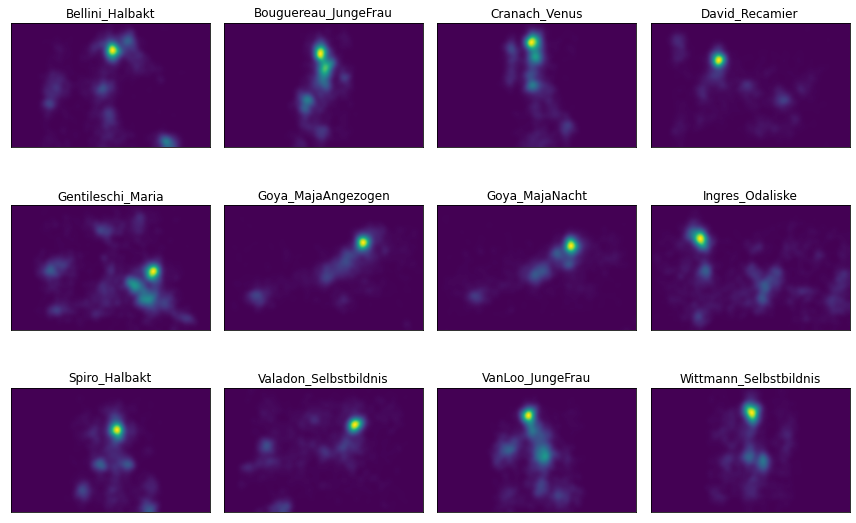

In [120]:
plt.figure(figsize=(12,8))
for cs,stim in enumerate(Stimuli):
    plt.subplot(3,4,cs+1)
    smap=pysim.SaliencyMap(FixDataPrep,stim,sizeX,sizeY,Ind=0,SD=35,Vis=1)
   # pysim.SaliencyPlot(smap,newfig=0)
    
    Fixcount=pysim.FixCountCalc(FixDataPrep,stim,sizeX,sizeY)
    Fixcount=np.sum(Fixcount,0)
    x1=int(Bounds['BoundX1'][Bounds['Stimulus']==stim])
    x2=int(Bounds['BoundX2'][Bounds['Stimulus']==stim])
    y1=int(Bounds['BoundY1'][Bounds['Stimulus']==stim])
    y2=int(Bounds['BoundY2'][Bounds['Stimulus']==stim])
    print(cs,stim,x1,x2,y1,y2)
    BinnedC=pysim.BinnedCount(Fixcount,x2,y2,x_size_start=x1,y_size_start=y1,binsize_h=100,binsize_v=100)
    plt.xticks([])
    plt.yticks([])
    Entr,RelativeEntr=pysim.Entropy(BinnedC)
    print(cs,stim,'entropy:',np.round(Entr,2),'relative entropy',np.round(RelativeEntr,2))
    plt.title(stim) 
plt.tight_layout()
    

0 5.0 75 1209 47 919
0 5.0 entropy: 3.83 relative entropy 0.86
1 17.0 59 1213 54 940
1 17.0 entropy: 3.68 relative entropy 0.82
2 19.0 65 1230 5 960
2 19.0 entropy: 4.34 relative entropy 0.94
3 20.0 74 1281 56 1120
3 20.0 entropy: 4.17 relative entropy 0.87
4 22.0 32 1278 10 946
4 22.0 entropy: 4.15 relative entropy 0.89
5 27.0 129 1166 -4 1012
5 27.0 entropy: 3.83 relative entropy 0.83
6 28.0 58 1226 122 1046
6 28.0 entropy: 4.13 relative entropy 0.9
7 29.0 38 1263 5 991
7 29.0 entropy: 4.25 relative entropy 0.91


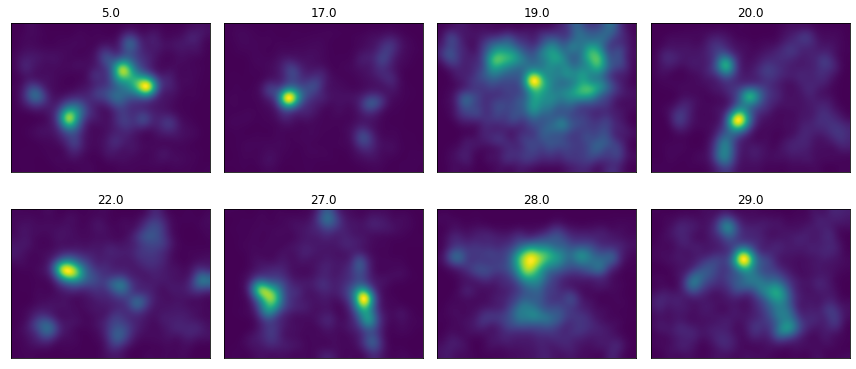

In [34]:
plt.figure(figsize=(12,8))
for cs,stim in enumerate(Stimuli[0:8]):
    plt.subplot(3,4,cs+1)
    smap=pysim.Heatmap(FixDataPrep,stim,sizeX,sizeY,Ind=0,SD=35,Vis=1)
   # pysim.SaliencyPlot(smap,newfig=0)
    
    Fixcount=pysim.FixCountCalc(FixDataPrep,stim,sizeX,sizeY)
    Fixcount=np.sum(Fixcount,0)
    x1=int(Bounds['BoundX1'][Bounds['Stimulus']==stim])
    x2=int(Bounds['BoundX2'][Bounds['Stimulus']==stim])
    y1=int(Bounds['BoundY1'][Bounds['Stimulus']==stim])
    y2=int(Bounds['BoundY2'][Bounds['Stimulus']==stim])
    print(cs,stim,x1,x2,y1,y2)
    BinnedC=pysim.BinnedCount(Fixcount,x2,y2,x_size_start=x1,y_size_start=y1,binsize_h=100,binsize_v=100)
    plt.xticks([])
    plt.yticks([])
    Entr,RelativeEntr=pysim.Entropy(BinnedC)
    print(cs,stim,'entropy:',np.round(Entr,2),'relative entropy',np.round(RelativeEntr,2))
    plt.title(stim) 
plt.tight_layout()
    

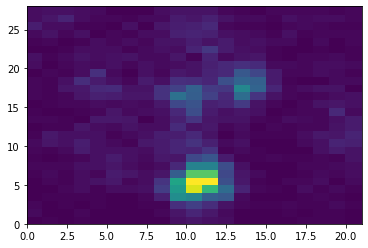

In [119]:
plt.pcolor(BinnedC)


## GetGroups-- within subject conditions



In [13]:
MyMemoryDat.GetCats('Category')

Conditions [ 7.  8. 10. 11.]


array([ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11.])

In [22]:
MyMemoryDat.CompareWithinGroupsFix('Category')

Conditions [ 7.  8. 10. 11.]
0 Category 7.0
0 7.0 Num fix=  16.26 +/- 2.4
0 7.0 Entropy=  2.56 +/- 0.16
0 7.0 tot scanpath len =  4006.67 +/- 798.1 pix
0 7.0 saccade amplitude =  263.0 +/- 39.44 pix

1 Category 8.0
1 8.0 Num fix=  17.06 +/- 1.57
1 8.0 Entropy=  2.52 +/- 0.14
1 8.0 tot scanpath len =  4001.26 +/- 544.6 pix
1 8.0 saccade amplitude =  250.82 +/- 33.9 pix

2 Category 10.0
2 10.0 Num fix=  16.27 +/- 2.19
2 10.0 Entropy=  2.54 +/- 0.15
2 10.0 tot scanpath len =  3775.66 +/- 798.29 pix
2 10.0 saccade amplitude =  247.05 +/- 35.38 pix

3 Category 11.0
3 11.0 Num fix=  13.01 +/- 3.62
3 11.0 Entropy=  2.32 +/- 0.32
3 11.0 tot scanpath len =  3079.01 +/- 1042.24 pix
3 11.0 saccade amplitude =  253.98 +/- 50.41 pix



<Figure size 576x576 with 0 Axes>

Conditions [ 7.  8. 10. 11.]


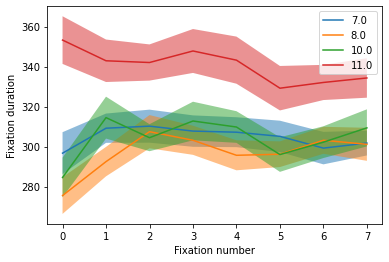

In [25]:
MyMemoryDat.FixDurProgGroups('Category',nfixmax=8)

In [27]:
MyMemoryDat.durs

<xarray.DataArray (subjectID: 45, Stimulus: 48)>
array([[272.52631579, 314.35294118, 272.63157895, ..., 365.29411765,
        281.05263158, 287.22222222],
       [246.125     , 412.        , 245.5       , ..., 356.22222222,
        274.        , 321.28571429],
       [281.68421053, 325.625     , 230.09090909, ..., 494.66666667,
        436.6       , 556.        ],
       ...,
       [313.05882353, 395.69230769, 480.33333333, ..., 558.        ,
        431.4       , 424.33333333],
       [247.71428571, 278.94736842, 289.        , ..., 327.125     ,
        308.23529412, 315.        ],
       [276.11111111, 294.        , 326.26666667, ..., 315.625     ,
        336.93333333, 319.375     ]])
Coordinates:
  * subjectID  (subjectID) float64 1.0 2.0 3.0 4.0 5.0 ... 42.0 43.0 44.0 45.0
  * Stimulus   (Stimulus) float64 5.0 17.0 19.0 20.0 ... 354.0 355.0 356.0 357.0

In [30]:
MyMemoryDat.durs

<xarray.DataArray (subjectID: 45, Stimulus: 48)>
array([[272.52631579, 314.35294118, 272.63157895, ..., 365.29411765,
        281.05263158, 287.22222222],
       [246.125     , 412.        , 245.5       , ..., 356.22222222,
        274.        , 321.28571429],
       [281.68421053, 325.625     , 230.09090909, ..., 494.66666667,
        436.6       , 556.        ],
       ...,
       [313.05882353, 395.69230769, 480.33333333, ..., 558.        ,
        431.4       , 424.33333333],
       [247.71428571, 278.94736842, 289.        , ..., 327.125     ,
        308.23529412, 315.        ],
       [276.11111111, 294.        , 326.26666667, ..., 315.625     ,
        336.93333333, 319.375     ]])
Coordinates:
  * subjectID  (subjectID) float64 1.0 2.0 3.0 4.0 5.0 ... 42.0 43.0 44.0 45.0
  * Stimulus   (Stimulus) float64 5.0 17.0 19.0 20.0 ... 354.0 355.0 356.0 357.0

## load some more within subject data

In [23]:
Filepath='/Users/jarato/Downloads/Two_Full_Groups.csv'

Filepath='C:\\Users\\aratoj87\\Documents\\ArtHistory\\Two_Full_Groups.csv'

FixData=pd.read_csv(Filepath)
sizeX= 2400
sizeY= 1800

In [10]:
FixData

,Unnamed: 0,Unnamed: 0.1,Session_Name_,RECORDING_SESSION_LABEL,TRIAL_INDEX,images,CURRENT_FIX_START,CURRENT_FIX_END,CURRENT_FIX_DURATION,CURRENT_FIX_X,CURRENT_FIX_Y,Group
0,0,0,1,1,1,Cranach.png,12,233,222,1433.1,1076.4,Group_A
1,1,1,1,1,1,Cranach.png,283,495,213,1227.0,617.1,Group_A
2,2,2,1,1,1,Cranach.png,510,776,267,1264.5,524.2,Group_A
3,3,3,1,1,1,Cranach.png,824,1191,368,1483.6,1010.0,Group_A
4,4,4,1,1,1,Cranach.png,1240,1561,322,1281.7,486.3,Group_A
...,...,...,...,...,...,...,...,...,...,...,...,...
101736,101736,215619,76,76,27,Durand.png,28961,29938,978,1759.7,582.9,Group_A
101737,101737,215629,76,76,27,Durand.png,2999,3000,1,1430.9,854.6,Group_A
101738,101738,215630,76,76,27,Durand.png,3000,3695,696,1430.9,854.6,Group_A
101739,101739,215648,76,76,27,Durand.png,9880,10000,120,1833.4,1869.3,Group_A


In [24]:
WithinDat=pysim.EyeData('WithinDat','Within',FixData,sizeX,sizeY)


Fixation dataset WithinDat
dataset size:  (101741, 12)
study design:  Within
presentation size:  x= 2400 pixels y= 1800  pixels
presentation size:  x= 2400 pixels y= 1800  pixels
StimName  not found !!, provide column as StimName =YourColumn default Stimulus
SubjName  not found !!, provide column as SubjName =YourColumn default subjectID
mean_x  not found !!, provide column as mean_x =YourColumn default mean_x
mean_y  not found !!, provide column as mean_y =YourColumn default mean_y


In [25]:
WithinDat.DataInfo(StimName='images',StimPath=0,SubjName='RECORDING_SESSION_LABEL',mean_x='CURRENT_FIX_X',mean_y='CURRENT_FIX_Y',FixDuration='CURRENT_FIX_DURATION',StimExt='')

info found for 50 subjects, and 27 stimuli
Stim path not provided


Data for  50 observers and  27  stimuli.
Abbott.png  Bound over x_size found indicating out of stimulus area fixations-replaced with 2400
Abbott.png  Bound over y_size found indicating out of stimulus area fixations-replaced with 1800
Bertin.png  Bound over x_size found indicating out of stimulus area fixations-replaced with 2400
Bertin.png  Bound over y_size found indicating out of stimulus area fixations-replaced with 1800
Cranach.png  Bound below zeroY found indicating out of stimulus area fixations-replaced with 0
Cranach.png  Bound over y_size found indicating out of stimulus area fixations-replaced with 1800
Durand.png  Bound over y_size found indicating out of stimulus area fixations-replaced with 1800
Edelfelt.png  Bound over x_size found indicating out of stimulus area fixations-replaced with 2400
Edelfelt.png  Bound over y_size found indicating out of stimulus area fixations-replaced with 1800
Friedrich_cairn.png  Bound over x_size found indicating out of stimulus area fixati

(array(['Abbott.png', 'Bertin.png', 'Cranach.png', 'Durand.png',
        'Edelfelt.png', 'Friedrich_cairn.png', 'Friedrich_solitary.png',
        'Gerstl.png', 'Giorgione.png', 'Godwin_God.png', 'Hoffmann.png',
        'Hudgins.png', 'Justas.png', 'Katzuo.png', 'Kooning.png',
        'Maed.png', 'Messina.png', 'Mitchell.png', 'Perina.png',
        'Ruysch.png', 'Schiele_lyricist.png', 'Schiele_self.png',
        'Schiele_setting.png', 'Schiele_tree.png', 'Serusier.png',
        'Still.png', 'Thomas.png'], dtype=object),
 array([ 1,  4,  6,  7,  9, 10, 11, 12, 13, 14, 15, 17, 19, 20, 22, 23, 24,
        25, 28, 30, 31, 32, 33, 34, 40, 41, 42, 44, 45, 46, 48, 51, 52, 53,
        55, 57, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 72, 73, 75, 76],
       dtype=int64))

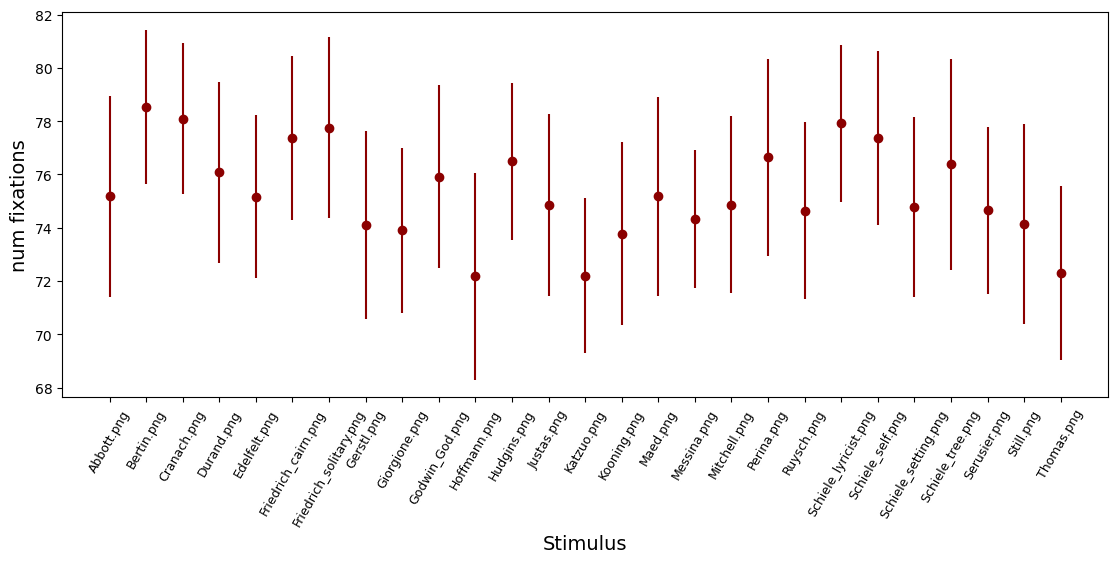

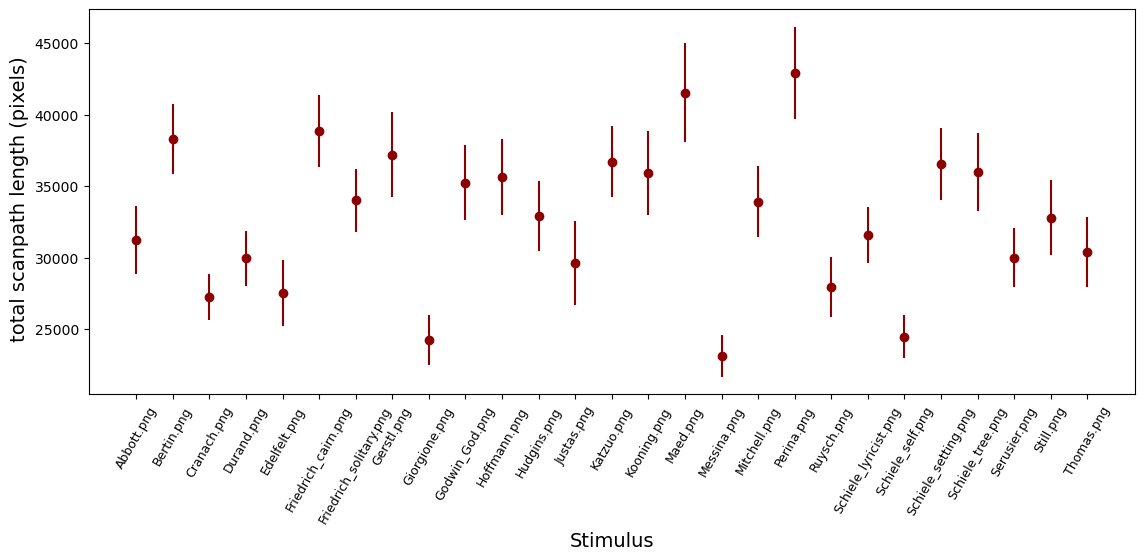

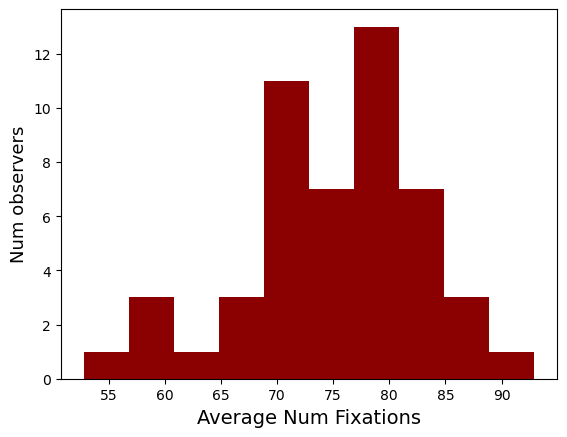

In [26]:
WithinDat.RunDescriptiveFix(Visual=1,duration=1)

In [17]:
WithinDat.GetCats('Group')

Conditions ['Group_A' 'Group_B' 'Group_C']


array([['Group_C'],
       ['Group_A'],
       ['Group_A'],
       ['Group_A'],
       ['Group_A'],
       ['Group_A'],
       ['Group_A'],
       ['Group_B'],
       ['Group_A'],
       ['Group_C'],
       ['Group_C'],
       ['Group_B'],
       ['Group_B'],
       ['Group_C'],
       ['Group_C'],
       ['Group_C'],
       ['Group_A'],
       ['Group_C'],
       ['Group_B'],
       ['Group_A'],
       ['Group_B'],
       ['Group_B'],
       ['Group_B'],
       ['Group_B'],
       ['Group_B'],
       ['Group_C'],
       ['Group_C']], dtype=object)

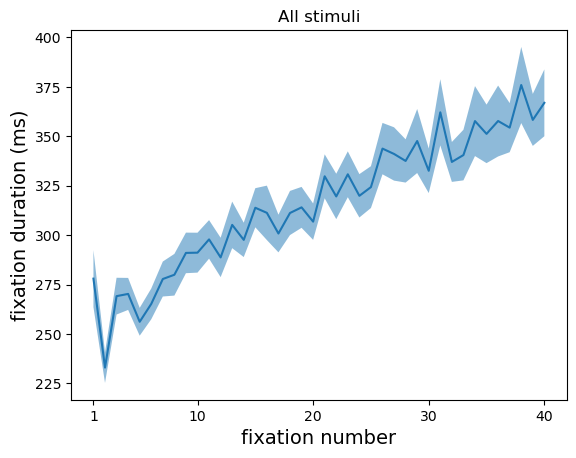

In [35]:
WithinDat.FixDurProg(nfixmax=40,Stim=0,Vis=1)

Conditions ['Group_A' 'Group_B' 'Group_C']


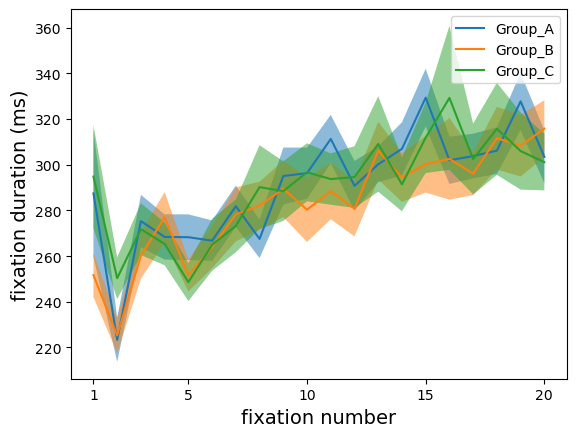

In [27]:
WithinDat.FixDurProgGroups('Group',nfixmax=20)

In [28]:
WithinDat.CompareWithinGroupsFix('Group')

Conditions ['Group_A' 'Group_B' 'Group_C']
Calculating entropy
0 Abbott.png 6.24 maximum entropy 7.17
1 Bertin.png 6.72 maximum entropy 7.31
2 Cranach.png 5.02 maximum entropy 6.92
3 Durand.png 5.98 maximum entropy 6.99
4 Edelfelt.png 5.15 maximum entropy 6.96
5 Friedrich_cairn.png 6.69 maximum entropy 7.36
6 Friedrich_solitary.png 6.31 maximum entropy 7.23
7 Gerstl.png 6.5 maximum entropy 7.19
8 Giorgione.png 5.13 maximum entropy 6.96
9 Godwin_God.png 6.11 maximum entropy 7.17
10 Hoffmann.png 6.26 maximum entropy 7.26
11 Hudgins.png 6.21 maximum entropy 7.14
12 Justas.png 6.01 maximum entropy 7.27
13 Katzuo.png 6.59 maximum entropy 7.32
14 Kooning.png 6.38 maximum entropy 7.14
15 Maed.png 6.58 maximum entropy 7.29


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\scipy\stats\_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


16 Messina.png 4.86 maximum entropy 6.76
17 Mitchell.png 6.35 maximum entropy 7.17
18 Perina.png 6.84 maximum entropy 7.38
19 Ruysch.png 5.28 maximum entropy 6.99
20 Schiele_lyricist.png 5.87 maximum entropy 7.17
21 Schiele_self.png 5.2 maximum entropy 6.92
22 Schiele_setting.png 6.38 maximum entropy 7.16
23 Schiele_tree.png 6.53 maximum entropy 7.22
24 Serusier.png 5.7 maximum entropy 6.96
25 Still.png 6.24 maximum entropy 7.11
26 Thomas.png 5.97 maximum entropy 7.11
0 Category Group_A
0 Group_A Num fix=  76.21 +/- 7.58
0 Group_A Entropy=  3.22 +/- 0.18
0 Group_A tot scanpath len =  30130.25 +/- 5267.4 pix
0 Group_A saccade amplitude =  400.64 +/- 59.79 pix

1 Category Group_B
1 Group_B Num fix=  75.91 +/- 8.59
1 Group_B Entropy=  3.74 +/- 0.13
1 Group_B tot scanpath len =  33474.44 +/- 6849.8 pix
1 Group_B saccade amplitude =  446.34 +/- 69.46 pix

2 Category Group_C
2 Group_C Num fix=  73.97 +/- 9.3
2 Group_C Entropy=  3.82 +/- 0.14
2 Group_C tot scanpath len =  34816.12 +/- 7470.58

<Figure size 800x800 with 0 Axes>

c:\users\aratoj87\documents\github\pyeyesim\PyEyeSim\pyeyesim.py:803: RuntimeWarning: divide by zero encountered in log2
  LogP=np.log2(StatP)


(array([[ 2.01364977,  0.32997767,  0.30689637],
        [ 0.78822264, -0.27520417, -0.29892755],
        [-1.39128202,  3.57079423,  1.39176526],
        [-0.23618987,  0.09832157, -0.49338663],
        [ 0.84513712,  1.48034135,  0.67140579],
        [-0.83077157, -0.61128167, -0.5284028 ],
        [ 0.09321427,  0.47859316,  0.09325586],
        [-0.66054188, -0.65888311, -0.67570972],
        [ 3.21844361, -0.91989673,  3.52448812],
        [-0.75370731,  0.60288544,  0.23373493],
        [ 0.05848551,  0.8295392 , -0.32202595],
        [-0.70962586, -0.97048602, -0.51818379],
        [ 0.26195617,  0.27010773,  0.08556839],
        [ 0.460595  , -0.16006429,  0.2047985 ],
        [-0.4234059 ,  0.13105795, -0.86741915],
        [-0.91222638,  0.0072501 , -0.48586108],
        [-1.82259672,  0.77729592,  2.28702363],
        [-0.18994473, -0.02071658, -0.42771129],
        [ 0.16295127, -0.93782965, -0.49417374],
        [ 0.34785313, -0.38471932, -0.31116285],
        [-0.3195842 

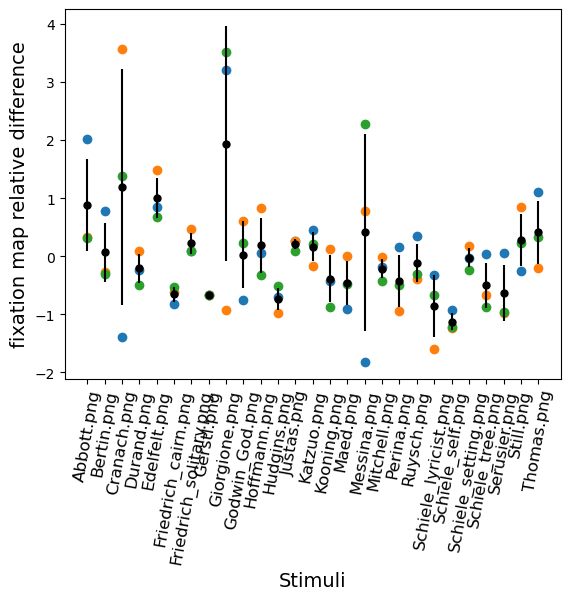

In [31]:
WithinDat.RunDiffDivs(2,5)

(array([13559., 12135., 10524., 11893.,  9501.,  9128.,  8763.,  8351.,
         7982.,  9905.]),
 array([2.10000e+01, 3.02960e+03, 6.03820e+03, 9.04680e+03, 1.20554e+04,
        1.50640e+04, 1.80726e+04, 2.10812e+04, 2.40898e+04, 2.70984e+04,
        3.01070e+04]),
 <BarContainer object of 10 artists>)

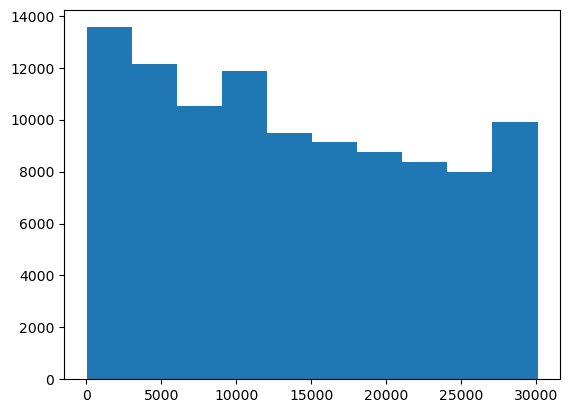

In [37]:
plt.hist(WithinDat.data['CURRENT_FIX_END'])




In [64]:
WithinDat.data

,Unnamed: 0,Unnamed: 0.1,Session_Name_,subjectID,TRIAL_INDEX,Stimulus,CURRENT_FIX_START,CURRENT_FIX_END,duration,mean_x,mean_y,Group
0,0,0,1,1,1,Cranach.png,12,233,222,1433.1,1076.4,Group_A
1,1,1,1,1,1,Cranach.png,283,495,213,1227.0,617.1,Group_A
2,2,2,1,1,1,Cranach.png,510,776,267,1264.5,524.2,Group_A
3,3,3,1,1,1,Cranach.png,824,1191,368,1483.6,1010.0,Group_A
4,4,4,1,1,1,Cranach.png,1240,1561,322,1281.7,486.3,Group_A
...,...,...,...,...,...,...,...,...,...,...,...,...
101736,101736,215619,76,76,27,Durand.png,28961,29938,978,1759.7,582.9,Group_A
101737,101737,215629,76,76,27,Durand.png,2999,3000,1,1430.9,854.6,Group_A
101738,101738,215630,76,76,27,Durand.png,3000,3695,696,1430.9,854.6,Group_A
101739,101739,215648,76,76,27,Durand.png,9880,10000,120,1833.4,1869.3,Group_A


In [46]:
binsize=10000
length=30000
Bins=np.arange(0,length+binsize,binsize)
for bs,be in zip(Bins[0:-1],Bins[1:]):
    BindIdx=(WithinDat.data['CURRENT_FIX_END']>bs) & (WithinDat.data['CURRENT_FIX_END']<be )
    print(bs,be,np.sum(BindIdx))

0 10000 39455
10000 20000 31963
20000 30000 27118


Bins [10000 13000 16000 19000 22000 25000 28000 31000]
from 10000 to 13000 found:  10717


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


from 13000 to 16000 found:  9378
from 16000 to 19000 found:  8947
from 19000 to 22000 found:  8588
from 22000 to 25000 found:  8226
from 25000 to 28000 found:  7992
from 28000 to 31000 found:  7454


<Figure size 640x480 with 0 Axes>

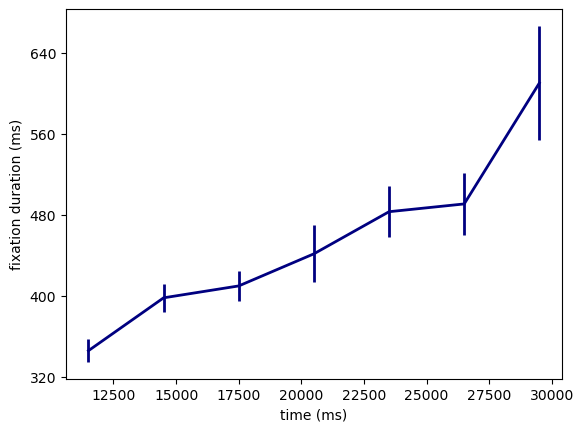

<Figure size 640x480 with 0 Axes>

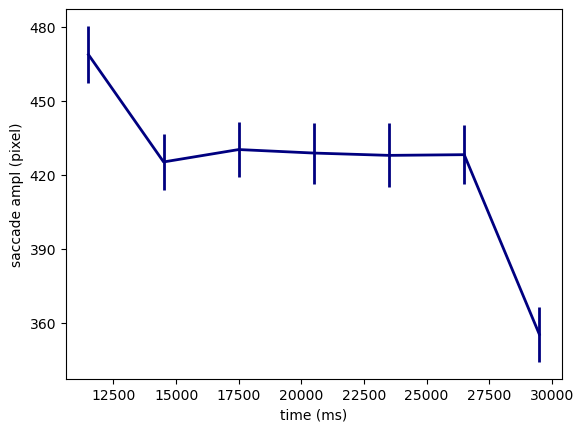

<Figure size 640x480 with 0 Axes>

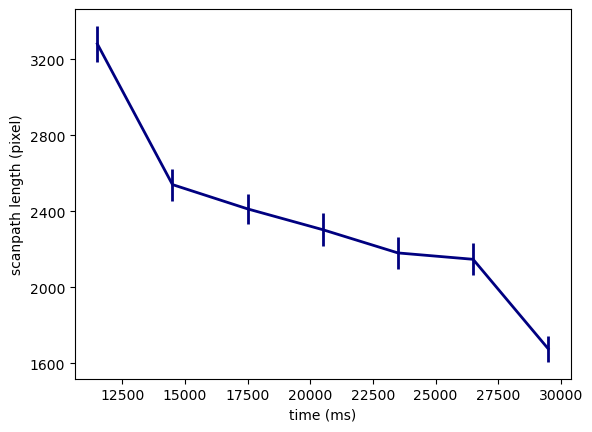

In [114]:
FixLengthBind,saccadeAmplbinned,ScanpLbinned=WithinDat.BinnedDescriptives(30000,3000,'CURRENT_FIX_END','duration',startime=10000)

In [85]:
np.unique(WithinDat.data.Group)

array(['Group_A', 'Group_B', 'Group_C'], dtype=object)

In [74]:
np.shape(np.nanmean(binDatal,1)),np.shape(BinDat)

((50, 6), (50, 6))

Bins [    0  5000 10000 15000 20000 25000 30000]
from 0 to 5000 found:  21903


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


from 5000 to 10000 found:  17550
from 10000 to 15000 found:  16963
from 15000 to 20000 found:  14995
from 20000 to 25000 found:  13896
from 25000 to 30000 found:  13219


<Figure size 640x480 with 0 Axes>

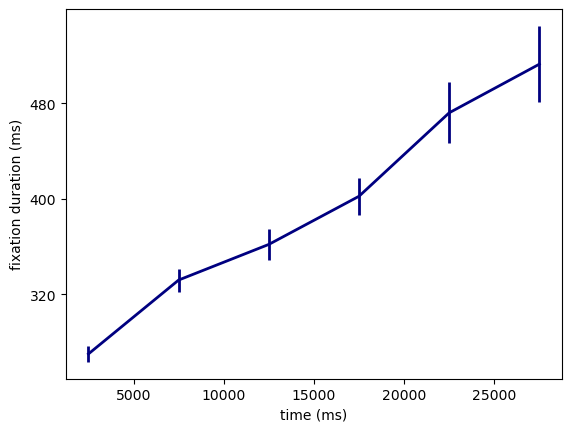

<Figure size 640x480 with 0 Axes>

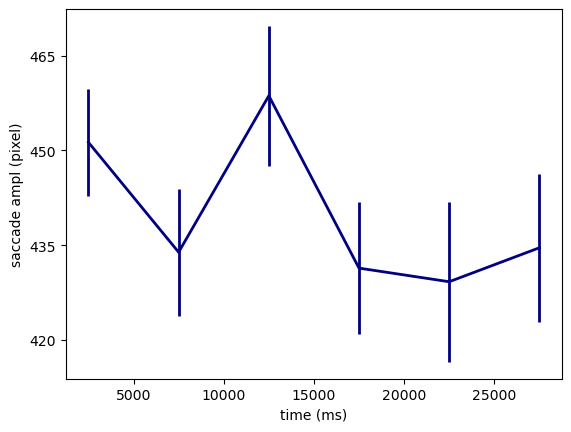

<Figure size 640x480 with 0 Axes>

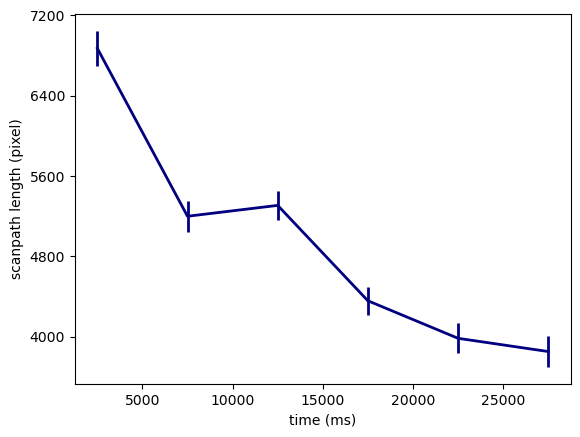

In [110]:
BinDat=WithinDat.BinnedDescriptives(15000,5000,'CURRENT_FIX_END','duration')

Conditions ['Group_A' 'Group_B' 'Group_C']


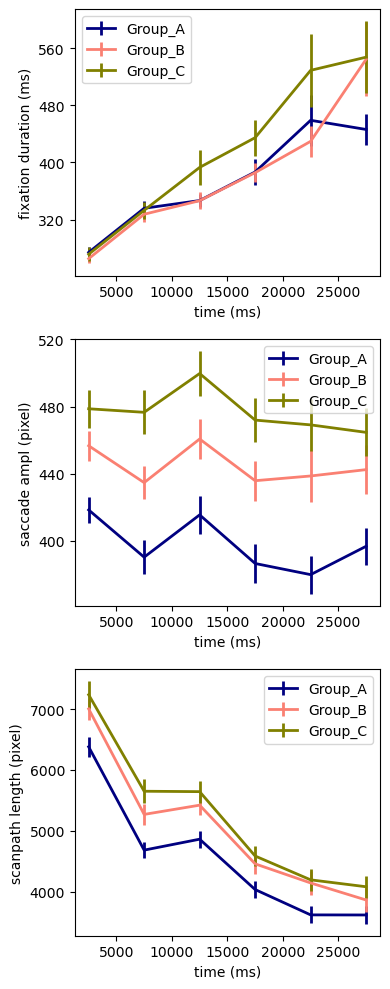

In [109]:
WithinDat.BinnedDescriptivesGroups('Group')

Conditions ['Group_A' 'Group_B' 'Group_C']


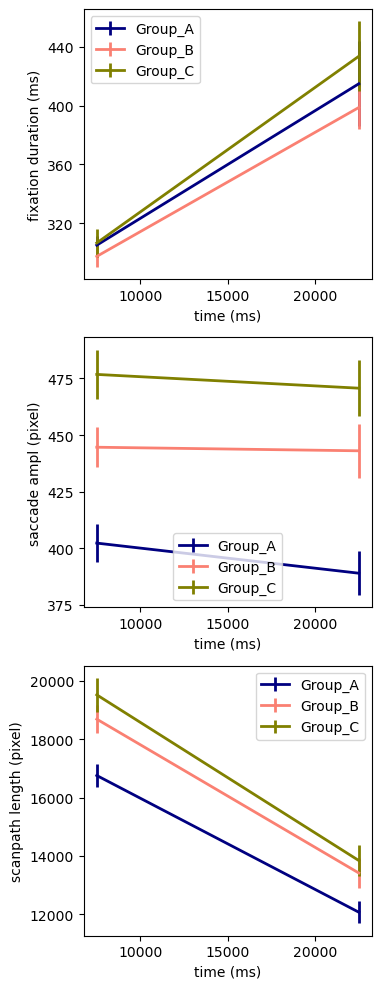

In [113]:
WithinDat.BinnedDescriptivesGroups('Group')